In [1]:
import numpy as np
import random

a = [3, 2, 1, 5, 7]
b = [2, 1, 0, 4, 6]

zipped = list(zip(a, b))

unzipped = list(zip(*zipped))
aa, bb = unzipped
list(aa)

[3, 2, 1, 5, 7]

In [3]:
from microcnn.value import Value
from microcnn.nn import Tanh
from microcnn.nn import Softmax
from utils import to_dot
from graphviz import Source

# sum(a)
a = Value(0.8)
b = Value(0.5)
c = Value(1.2)

# softmax = Softmax()
d = Softmax().forward([a, b, c])

d

[Value(data: 0.309, grad: 0.000, op: /, children: ['2.226', '7.194']),
 Value(data: 0.229, grad: 0.000, op: /, children: ['1.649', '7.194']),
 Value(data: 0.461, grad: 0.000, op: /, children: ['3.320', '7.194'])]

In [1]:
from microcnn.value import Value
from microcnn.nn import Tanh, Neuron, Model, Layer, ReLU, SGD, RMSLoss
import math
from utils import to_dot
from graphviz import Source

m0 = Model([Layer(2,3, Tanh()),
           Layer(3,2, Tanh()),
           Layer(2,1, None)])

optimizer = SGD()
loss_fc = RMSLoss()

[Value(data: 0.225, grad: 0.037, op: None), Value(data: 0.309, grad: 0.055, op: None), Value(data: 0.098, grad: 0.018, op: None), Value(data: -0.107, grad: -0.020, op: None), Value(data: -0.261, grad: -0.036, op: None), Value(data: -0.131, grad: -0.012, op: None), Value(data: 0.141, grad: -0.009, op: None), Value(data: 0.088, grad: -0.003, op: None), Value(data: -0.047, grad: -0.001, op: None), Value(data: -0.000, grad: -0.062, op: None), Value(data: -0.087, grad: 0.056, op: None), Value(data: 0.062, grad: -0.032, op: None), Value(data: 0.028, grad: -0.069, op: None), Value(data: 0.548, grad: 0.159, op: None), Value(data: -0.336, grad: -0.143, op: None), Value(data: 0.090, grad: 0.081, op: None), Value(data: 0.766, grad: 0.176, op: None), Value(data: -0.070, grad: 0.126, op: None), Value(data: 1.113, grad: 0.918, op: None), Value(data: 3.986, grad: 1.000, op: None)]
[Value(data: 0.999, grad: -1.000, op: +, children: ['1.381', '-0.382'])]


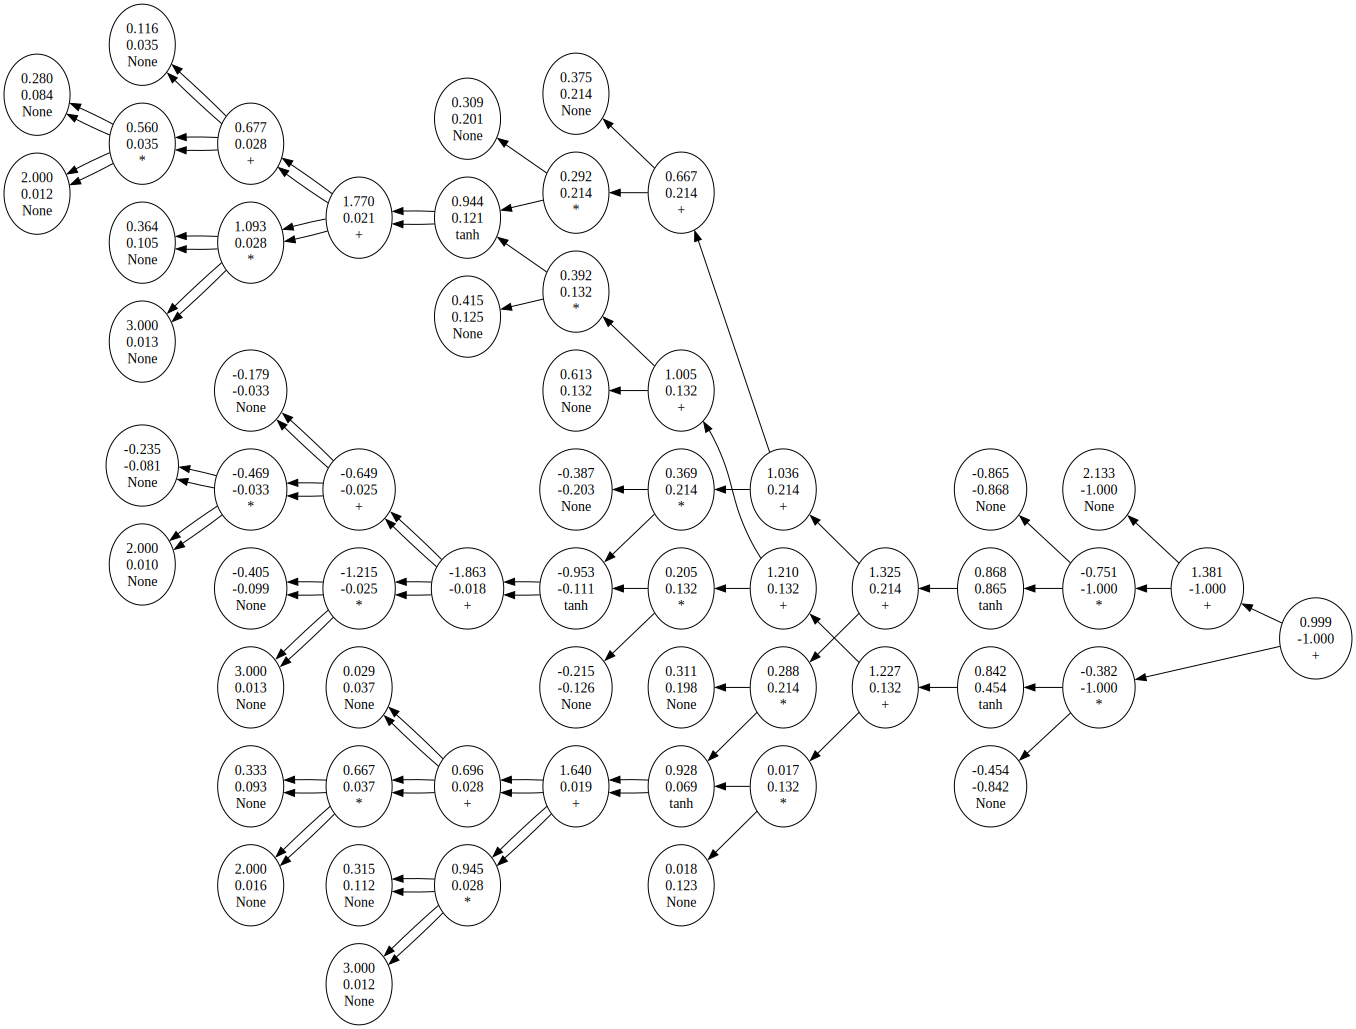

In [7]:
a = 2.0
b = 3.0

print(m0.parameters())

for e in range(500):
    c = m0.forward([a, b])
    
    # if c[0].data > 5:
    loss = loss_fc.forward(c, [1.0])
    # loss =c[0] -1
    loss.zero_grad()

    loss.grad = 1.0

    loss.backward()
    
    optimizer.step(m0.parameters())
    

print(c)

dot = to_dot(c[0])
Source(dot.source)

In [4]:
import random
random.uniform(-0.1, 0.1)

-0.027476160378572326